# Graphs
- non-linear aggregation of **nodes** and **edges**
- Node: also known as *vertex*; may contain data
- Edge: connection between two nodes

**Types of graphs**
- Undirected
- Directed

Graphs are represented either by: 
- **Adjacency Matrix:**  
   - a 2d array is created
   - one row and one column for each node
   - consists of **0**s and **1**s; if 1: then edge exits between the nodes in the column and row.
   - runtime complexity: O(1)
   - space complexity: O(V^2)  #V : vertices

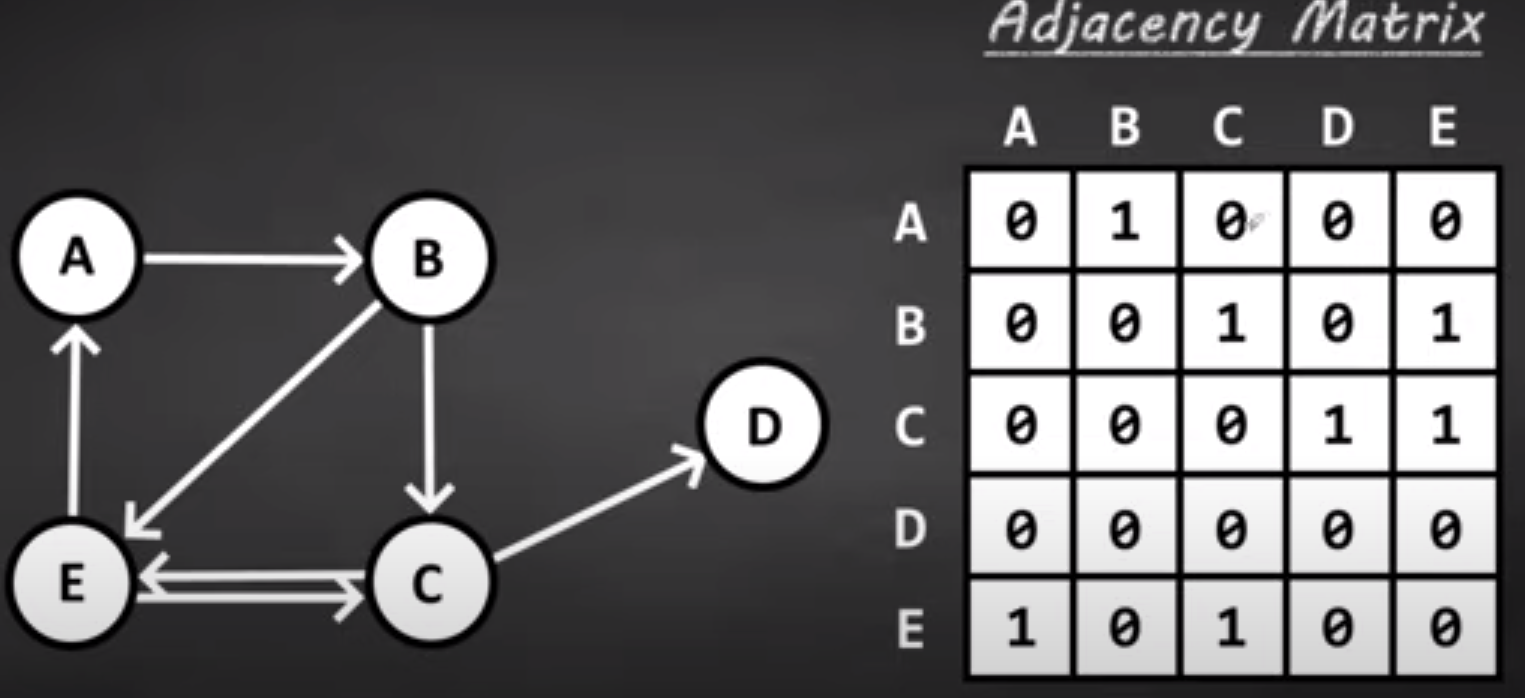

or 

- **Adjacency List:**
  - is an array or an array list of linked lists
  - each header in the linked list contains the address of a node
  - if there is adjacency between one node and another it will added to its linked list 
  - runtime complexity: O(V)
  - space complexity: O(V+E) #E : edges

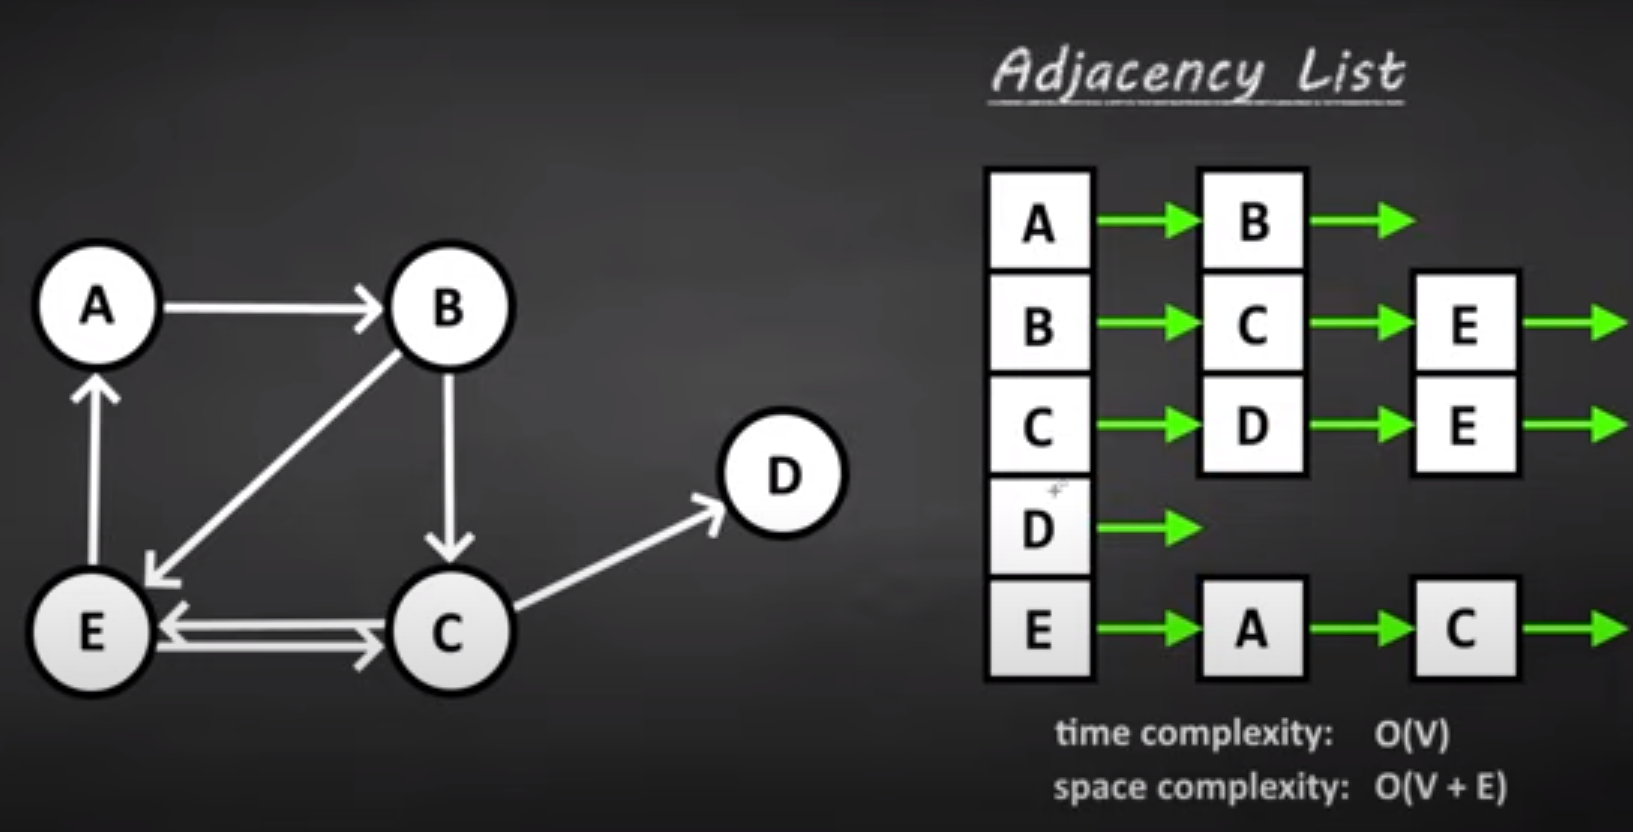

## Graph:

In [37]:
class Node:
    """Node Class"""
    
    def __init__(self, data):
        self.data = data

    def __str__(self):
        return str(self.data)

 
class Graph:
    """Graph Class"""
    def __init__(self, directed = False):
        self.directed = directed
        self.nodes = []
        self.edges = []

    def add_node(self, node):
        self.nodes.append(node)

    def add_edge(self, node1, node2):
        self.edges.append([node1, node2])
        if not self.directed:
            self.edges.append([node2, node1])


    #Adjacency Matrix
    def get_adj_mat(self, print_ = False):
        self.adj_matrix = [[0 for node in self.nodes] for node in self.nodes]

        for node1,node2 in self.edges:
            idx1 = self.nodes.index(node1)
            idx2 = self.nodes.index(node2)

            self.adj_matrix[idx1][idx2] = 1
        
        if print_:
            print('\t', *self.nodes)
            for i in range(len(self.nodes)):
                print(f'{self.nodes[i].data, self.adj_matrix[i]}')

        return  self.adj_matrix


    #Adjacency List
    def get_adj_list(self, print_ = False):
        self.adj_list = {node.data: [] for node in self.nodes}
        for node1,node2 in self.edges:
            self.adj_list[node1.data].append(node2.data)

        if print_:
            print(self.adj_list)
        return self.adj_list


In [38]:
a = Node('A')
b = Node('B')
c = Node('C')
d = Node('D')

In [39]:
graph1 = Graph()

graph1.add_node(a)
graph1.add_node(b)
graph1.add_node(c)
graph1.add_node(d)

In [40]:
graph1.add_edge(a, b)
graph1.add_edge(b,c)
graph1.add_edge(b,d)

In [41]:
graph1.get_adj_list()

{'A': ['B'], 'B': ['A', 'C', 'D'], 'C': ['B'], 'D': ['B']}

In [42]:
graph1.get_adj_mat(True)

	 A B C D
('A', [0, 1, 0, 0])
('B', [1, 0, 1, 1])
('C', [0, 1, 0, 0])
('D', [0, 1, 0, 0])


[[0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 0]]

## Searching:

In [43]:
def find_path(graph, start, end):
        start = start.data
        end = end.data

        print(start,end )

            
        def find_path_inner(graph, start, end, path=[]):
            path = path + [start]
            
            if start == end:
                return path
            
            adj_list = graph.get_adj_list()

            if start not in adj_list or end not in adj_list:
                print('Start and/or End Node is not in the Graph')
                return None
            
            for node in adj_list[start]:
                if node not in path:
                    newpath = find_path_inner(graph, node, end, path)
                    if newpath: return newpath
            return None
        
        path = find_path_inner(graph, start, end)
        return path

In [44]:
find_path(graph1, a, d)

A D


['A', 'B', 'D']

## Displaying

In [ ]:
from pyvis.network import Network

def show(graph):
    g=Network(directed=graph.directed)
    
    nodes = [node.data for node in graph.nodes]
    edges= []
    for edge in graph.edges:
        edges.append([edge[0].data, edge[1].data]) 
    
    g.add_nodes(nodes)
    g.add_edges(edges)
    
    g.show("Graph.html")
    return g

show(graph1)

<class 'pyvis.network.Network'> |N|=4 |E|=3